# Natural Language Processing (NLP) for Sentiment Analysis

## Project Overview

This project implements a **sentiment analysis system** using Natural Language Processing (NLP) techniques on the **IMDB Movie Reviews dataset from Kaggle**. The goal is to classify movie reviews as either **positive** or **negative** based on their text content.

### Dataset Source:
**Kaggle IMDB Dataset**: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

This dataset contains 50,000 movie reviews labeled as positive or negative, making it one of the most popular benchmark datasets for sentiment analysis.

### Objectives:
1. **Data Collection**: Download and load the IMDB dataset from Kaggle
2. **Exploratory Data Analysis**: Analyze the dataset structure and characteristics
3. **Text Preprocessing**: Apply NLP preprocessing techniques (tokenization, stopword removal, lemmatization)
4. **Feature Extraction**: Convert text to numerical features using TF-IDF vectorization
5. **Model Building**: Train and compare multiple classification algorithms
6. **Evaluation**: Assess model performance using accuracy, precision, recall, and F1-score
7. **Visualization**: Create informative visualizations of results using matplotlib and seaborn

## 1. Import Libraries and Setup

First, we import all necessary libraries for data manipulation, NLP processing, machine learning, and visualization.


In [1]:
# Import required libraries
import os
import re
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# WordCloud for visualization
from wordcloud import WordCloud

# Kaggle data download
import kagglehub

# Suppress warnings
warnings.filterwarnings("ignore")

# Download required NLTK data
nltk.download("punkt", quiet=True)
nltk.download("punkt_tab", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)

# Set plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

print("All libraries imported successfully")

All libraries imported successfully


## 2. Data Collection from Kaggle

We'll download the **IMDB Dataset of 50K Movie Reviews** directly from Kaggle using the `kagglehub` library. This dataset is widely used for sentiment analysis and contains:
- 50,000 movie reviews
- Binary labels: positive and negative
- Real user reviews from IMDB

**Dataset URL**: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


In [2]:
# Download the IMDB dataset from Kaggle
print("Downloading dataset from Kaggle...")

# Download dataset using kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print(f"Dataset downloaded to: {path}")

# Find the CSV file
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

print(f"Found dataset file: {csv_file}")

# Load the dataset
df = pd.read_csv(csv_file)

print(f"\nDataset loaded successfully")
print(f"Total number of reviews: {len(df):,}")
print(f"Columns: {list(df.columns)}")

Dataset downloaded to: C:\Users\User\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1
Found dataset file: C:\Users\User\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1\IMDB Dataset.csv

Dataset loaded successfully
Total number of reviews: 50,000
Columns: ['review', 'sentiment']


In [3]:
# Convert sentiment labels to binary (0 for negative, 1 for positive)
df["sentiment_label"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Display first few rows of the dataset
print("Dataset Preview")
print("-" * 60)
print("\nFirst 5 reviews:")
display(df.head())

# Display a sample review
print("\nSample Positive Review:")
print("-" * 60)
sample_positive = df[df["sentiment"] == "positive"]["review"].iloc[0][:500]
print(f"{sample_positive}...")

print("\nSample Negative Review:")
print("-" * 60)
sample_negative = df[df["sentiment"] == "negative"]["review"].iloc[0][:500]
print(f"{sample_negative}...")

Dataset Preview
------------------------------------------------------------

First 5 reviews:


,review,sentiment,sentiment_label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1



Sample Positive Review:
------------------------------------------------------------
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

Sample Negative Review:
------------------------------------------------------------
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decid

## 3. Exploratory Data Analysis (EDA)

Let's explore the Kaggle IMDB dataset to understand its structure, distribution, and characteristics.


In [4]:
# Display basic information about the dataset
print("Dataset Overview")
print("-" * 60)

# Dataset shape
print(f"\nDataset Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")

# Data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Basic statistics
print("\nSentiment Distribution:")
print(df["sentiment"].value_counts())

Dataset Overview
------------------------------------------------------------

Dataset Shape: 50,000 rows x 3 columns

Data Types:
review             object
sentiment          object
sentiment_label     int64
dtype: object

Missing Values:
review             0
sentiment          0
sentiment_label    0
dtype: int64

Duplicate rows: 418

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


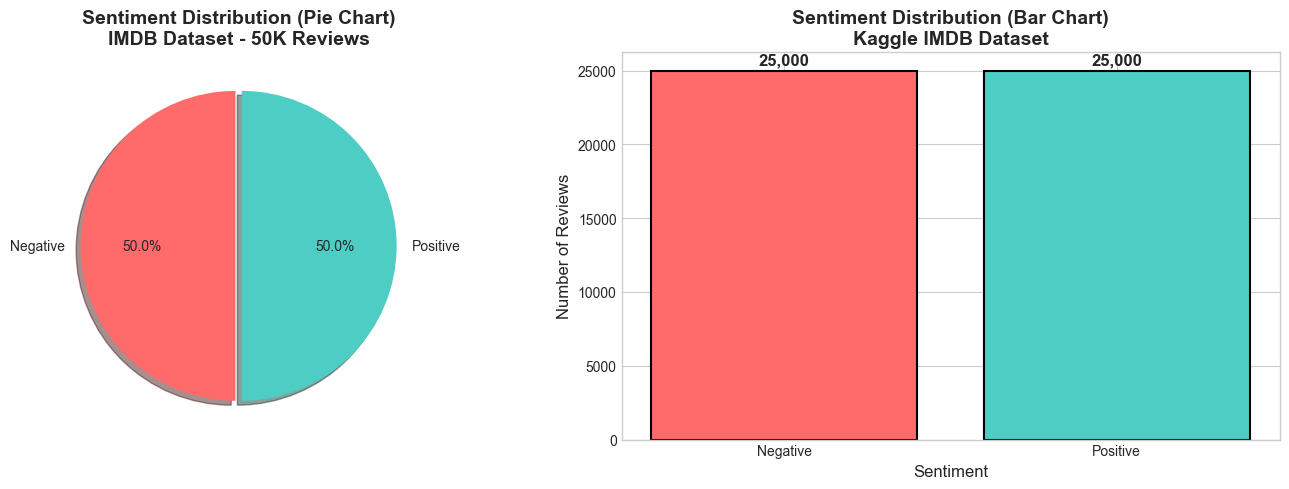

In [5]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
sentiment_counts = df["sentiment"].value_counts()
labels = ["Negative", "Positive"]
colors = ["#FF6B6B", "#4ECDC4"]
explode = (0.02, 0.02)

axes[0].pie(
    sentiment_counts,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=90,
)
axes[0].set_title(
    "Sentiment Distribution (Pie Chart)\nIMDB Dataset - 50K Reviews",
    fontsize=14,
    fontweight="bold",
)

# Bar chart
sentiment_labels = ["Negative", "Positive"]
bars = axes[1].bar(
    sentiment_labels,
    sentiment_counts.values,
    color=colors,
    edgecolor="black",
    linewidth=1.5,
)
axes[1].set_xlabel("Sentiment", fontsize=12)
axes[1].set_ylabel("Number of Reviews", fontsize=12)
axes[1].set_title(
    "Sentiment Distribution (Bar Chart)\nKaggle IMDB Dataset",
    fontsize=14,
    fontweight="bold",
)

# Add value labels on bars
for bar, count in zip(bars, sentiment_counts.values):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 200,
        f"{count:,}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

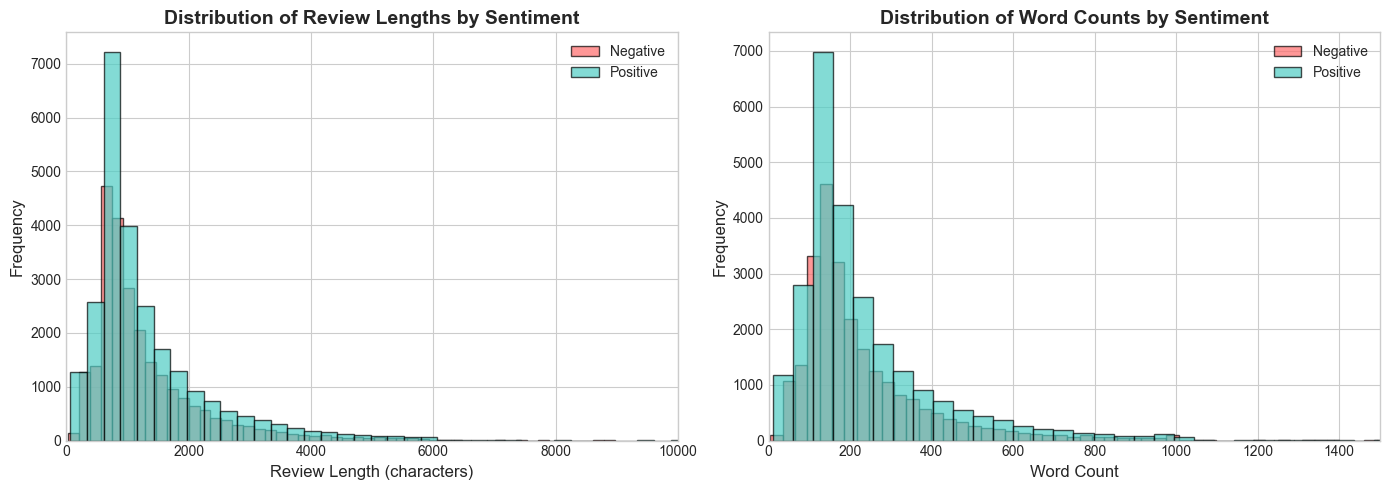


Review Length Statistics:
--------------------------------------------------
Average characters per review: 1,309.4
Average words per review: 231.2
Shortest review: 32 characters
Longest review: 13,704 characters
Median word count: 173


In [6]:
# Analyze review lengths
df["review_length"] = df["review"].apply(len)
df["word_count"] = df["review"].apply(lambda x: len(str(x).split()))

# Visualize review length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character count distribution by sentiment
for sentiment, color, label in [
    ("negative", "#FF6B6B", "Negative"),
    ("positive", "#4ECDC4", "Positive"),
]:
    subset = df[df["sentiment"] == sentiment]
    axes[0].hist(
        subset["review_length"],
        bins=50,
        alpha=0.7,
        color=color,
        label=label,
        edgecolor="black",
    )

axes[0].set_xlabel("Review Length (characters)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_title(
    "Distribution of Review Lengths by Sentiment", fontsize=14, fontweight="bold"
)
axes[0].legend()
axes[0].set_xlim(0, 10000)

# Word count distribution by sentiment
for sentiment, color, label in [
    ("negative", "#FF6B6B", "Negative"),
    ("positive", "#4ECDC4", "Positive"),
]:
    subset = df[df["sentiment"] == sentiment]
    axes[1].hist(
        subset["word_count"],
        bins=50,
        alpha=0.7,
        color=color,
        label=label,
        edgecolor="black",
    )

axes[1].set_xlabel("Word Count", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title(
    "Distribution of Word Counts by Sentiment", fontsize=14, fontweight="bold"
)
axes[1].legend()
axes[1].set_xlim(0, 1500)

plt.tight_layout()
plt.show()

# Print statistics
print("\nReview Length Statistics:")
print("-" * 50)
print(f"Average characters per review: {df['review_length'].mean():,.1f}")
print(f"Average words per review: {df['word_count'].mean():,.1f}")
print(f"Shortest review: {df['review_length'].min():,} characters")
print(f"Longest review: {df['review_length'].max():,} characters")
print(f"Median word count: {df['word_count'].median():,.0f}")

## 4. Text Preprocessing

Text preprocessing is a crucial step in NLP. We'll apply the following techniques to clean the raw IMDB reviews:

1. **HTML tag removal**: Remove any HTML tags from reviews (common in web-scraped data)
2. **Lowercasing**: Convert all text to lowercase for uniformity
3. **Removing special characters**: Remove punctuation and special symbols
4. **Removing numbers**: Remove numerical digits
5. **Tokenization**: Split text into individual words (tokens)
6. **Stopword removal**: Remove common words that don't carry much meaning
7. **Lemmatization**: Reduce words to their base form


In [7]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    # Step 1: Remove HTML tags
    text = re.sub(r"<[^>]+>", "", str(text))

    # Step 2: Convert to lowercase
    text = text.lower()

    # Step 3: Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Step 4: Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Step 5: Tokenize
    tokens = word_tokenize(text)

    # Step 6: Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words and len(token) > 2
    ]

    # Step 7: Join tokens back to string
    cleaned_text = " ".join(cleaned_tokens)

    return cleaned_text


# Demonstrate preprocessing on a sample review
sample_review = df["review"].iloc[0]
print("Preprocessing Demonstration")
print("-" * 70)
print(f"\nOriginal Review (first 500 chars):")
print(f"   '{sample_review[:500]}...'")
print(f"\nPreprocessed Review:")
preprocessed = preprocess_text(sample_review)
print(f"   '{preprocessed[:300]}...'")
print(
    f"\nOriginal length: {len(sample_review)} chars -> Preprocessed: {len(preprocessed)} chars"
)

Preprocessing Demonstration
----------------------------------------------------------------------

Original Review (first 500 chars):
   'One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...'

Preprocessed Review:
   'one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called nickname given oswald maximum security s...'

Original length: 1761 ch

In [8]:
# Apply preprocessing to all reviews
# This may take a few minutes for 50,000 reviews
print("Preprocessing all 50,000 reviews...")
print("This may take a few minutes...\n")

# Using the full dataset for comprehensive analysis
df["cleaned_review"] = df["review"].apply(preprocess_text)

# Display comparison
print("\nPreprocessing complete!")
print("\nSample of original vs cleaned reviews:")
print("-" * 70)

for idx in range(3):
    row = df.iloc[idx]
    print(f"\n[{idx}] Sentiment: {row['sentiment'].upper()}")
    print(f"    Original: {row['review'][:80]}...")
    print(f"    Cleaned:  {row['cleaned_review'][:80]}...")

Preprocessing all 50,000 reviews...
This may take a few minutes...


Preprocessing complete!

Sample of original vs cleaned reviews:
----------------------------------------------------------------------

[0] Sentiment: POSITIVE
    Original: One of the other reviewers has mentioned that after watching just 1 Oz episode y...
    Cleaned:  one reviewer mentioned watching episode youll hooked right exactly happened meth...

[1] Sentiment: POSITIVE
    Original: A wonderful little production. <br /><br />The filming technique is very unassum...
    Cleaned:  wonderful little production filming technique unassuming oldtimebbc fashion give...

[2] Sentiment: POSITIVE
    Original: I thought this was a wonderful way to spend time on a too hot summer weekend, si...
    Cleaned:  thought wonderful way spend time hot summer weekend sitting air conditioned thea...


## 5. Word Cloud Visualization

Word clouds provide an intuitive visualization of the most frequent words in positive and negative reviews from the IMDB dataset.


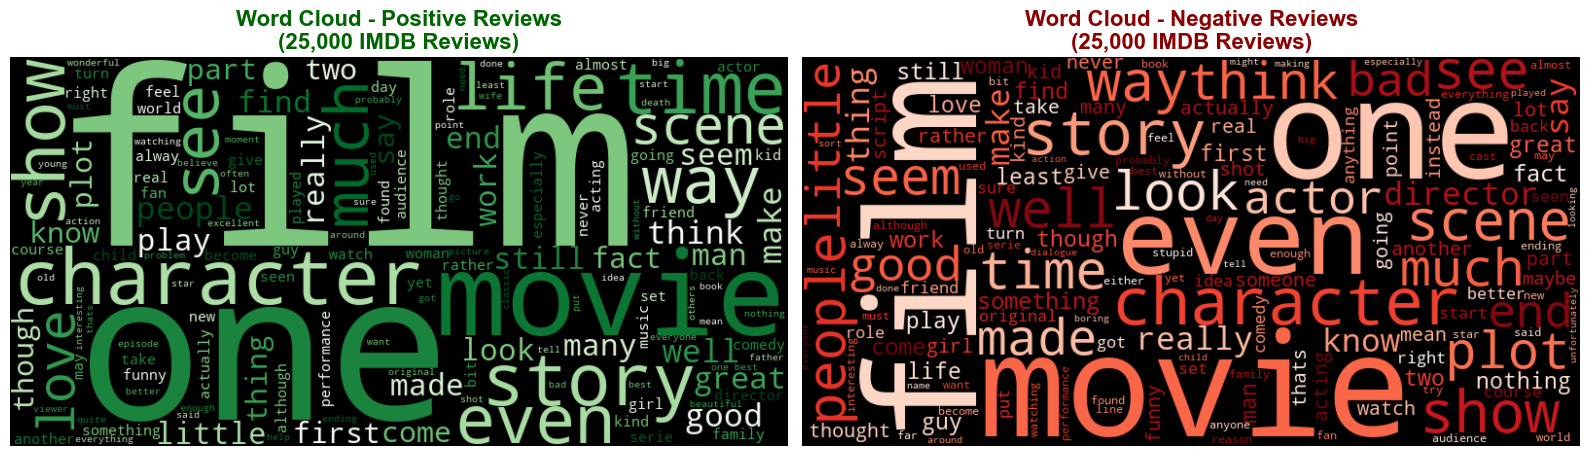

In [9]:
# Generate word clouds for positive and negative reviews
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive reviews word cloud
positive_text = " ".join(df[df["sentiment"] == "positive"]["cleaned_review"].values)
wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Greens",
    max_words=150,
    contour_width=2,
    contour_color="darkgreen",
).generate(positive_text)

axes[0].imshow(wordcloud_positive, interpolation="bilinear")
axes[0].set_title(
    "Word Cloud - Positive Reviews\n(25,000 IMDB Reviews)",
    fontsize=16,
    fontweight="bold",
    color="darkgreen",
)
axes[0].axis("off")

# Negative reviews word cloud
negative_text = " ".join(df[df["sentiment"] == "negative"]["cleaned_review"].values)
wordcloud_negative = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Reds",
    max_words=150,
    contour_width=2,
    contour_color="darkred",
).generate(negative_text)

axes[1].imshow(wordcloud_negative, interpolation="bilinear")
axes[1].set_title(
    "Word Cloud - Negative Reviews\n(25,000 IMDB Reviews)",
    fontsize=16,
    fontweight="bold",
    color="darkred",
)
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 6. Feature Extraction using TF-IDF

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects how important a word is to a document in a collection. It helps convert text data into numerical vectors that machine learning models can process.

- **TF (Term Frequency)**: Measures how frequently a term occurs in a document
- **IDF (Inverse Document Frequency)**: Measures how important a term is across all documents

For the 50,000 IMDB reviews, we'll create a TF-IDF matrix with the most important features.


In [10]:
# Prepare features and target
X = df["cleaned_review"]
y = df["sentiment_label"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Split Summary")
print("-" * 60)
print(f"\nTraining set size: {len(X_train):,} reviews")
print(f"Testing set size: {len(X_test):,} reviews")
print(f"\nTraining set class distribution:")
print(
    f"   - Negative: {sum(y_train == 0):,} ({sum(y_train == 0) / len(y_train) * 100:.1f}%)"
)
print(
    f"   - Positive: {sum(y_train == 1):,} ({sum(y_train == 1) / len(y_train) * 100:.1f}%)"
)
print(f"\nTesting set class distribution:")
print(
    f"   - Negative: {sum(y_test == 0):,} ({sum(y_test == 0) / len(y_test) * 100:.1f}%)"
)
print(
    f"   - Positive: {sum(y_test == 1):,} ({sum(y_test == 1) / len(y_test) * 100:.1f}%)"
)

Data Split Summary
------------------------------------------------------------

Training set size: 40,000 reviews
Testing set size: 10,000 reviews

Training set class distribution:
   - Negative: 20,000 (50.0%)
   - Positive: 20,000 (50.0%)

Testing set class distribution:
   - Negative: 5,000 (50.0%)
   - Positive: 5,000 (50.0%)


In [11]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Limit to top 10000 features for the large dataset
    ngram_range=(1, 2),  # Use unigrams and bigrams
    min_df=5,  # Minimum document frequency
    max_df=0.95,  # Maximum document frequency (ignore very common words)
)

# Fit and transform training data
print("Vectorizing training data...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
print("Vectorizing testing data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nTF-IDF Vectorization Complete")
print("-" * 60)
print(f"\nTraining TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Testing TF-IDF matrix shape: {X_test_tfidf.shape}")
print(f"\nNumber of features (vocabulary size): {len(tfidf_vectorizer.vocabulary_):,}")

# Display sample features
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nSample features from vocabulary:")
print(f"   {list(feature_names[:10])}...")
print(f"   {list(feature_names[-10:])}...")

Vectorizing training data...
Vectorizing testing data...

TF-IDF Vectorization Complete
------------------------------------------------------------

Training TF-IDF matrix shape: (40000, 10000)
Testing TF-IDF matrix shape: (10000, 10000)

Number of features (vocabulary size): 10,000

Sample features from vocabulary:
   ['aaron', 'abandon', 'abandoned', 'abbott', 'abc', 'ability', 'able', 'able get', 'able make', 'able see']...
   ['youve got', 'youve never', 'youve seen', 'zany', 'zero', 'zoey', 'zombie', 'zombie movie', 'zone', 'zoom']...


## 7. Model Training and Comparison

We'll train and compare four different classification algorithms on the 50,000 IMDB reviews:

1. **Naive Bayes (Multinomial)**: A probabilistic classifier based on Bayes' theorem, particularly effective for text classification
2. **Logistic Regression**: A linear model for binary classification that estimates probabilities
3. **Support Vector Machine (SVM)**: Finds the optimal hyperplane to separate classes
4. **Random Forest**: An ensemble method that combines multiple decision trees


In [12]:
# Define models to compare
models = {
    "Naive Bayes": MultinomialNB(alpha=1.0),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, random_state=42, n_jobs=-1
    ),
    "SVM (Linear)": LinearSVC(random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
}

# Dictionary to store results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# Dictionary to store predictions for later visualization
predictions = {}

print("Model Training and Evaluation")
print("-" * 70)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    predictions[name] = y_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

    print(f"   {name} trained successfully")
    print(
        f"   Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}"
    )

print("\nAll models trained and evaluated successfully")

Model Training and Evaluation
----------------------------------------------------------------------

Training Naive Bayes...
   Naive Bayes trained successfully
   Accuracy: 0.8660 | Precision: 0.8538 | Recall: 0.8832 | F1: 0.8683

Training Logistic Regression...
   Logistic Regression trained successfully
   Accuracy: 0.8921 | Precision: 0.8843 | Recall: 0.9022 | F1: 0.8932

Training SVM (Linear)...
   SVM (Linear) trained successfully
   Accuracy: 0.8843 | Precision: 0.8782 | Recall: 0.8924 | F1: 0.8852

Training Random Forest...
   Random Forest trained successfully
   Accuracy: 0.8557 | Precision: 0.8579 | Recall: 0.8526 | F1: 0.8553

All models trained and evaluated successfully


## 8. Results Visualization

Let's visualize and compare the performance of all models trained on the Kaggle IMDB dataset.


In [13]:
# Create results DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison Summary (50K IMDB Reviews):")
print("-" * 60)
display(results_df.round(4))

# Identify the best model
best_model_idx = results_df["F1-Score"].idxmax()
best_model = results_df.loc[best_model_idx, "Model"]
best_f1 = results_df.loc[best_model_idx, "F1-Score"]
best_accuracy = results_df.loc[best_model_idx, "Accuracy"]

print(f"\nBest performing model: {best_model}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Accuracy: {best_accuracy:.4f}")

Model Comparison Summary (50K IMDB Reviews):
------------------------------------------------------------


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.8660,0.8538,0.8832,0.8683
1,Logistic Regression,0.8921,0.8843,0.9022,0.8932
2,SVM (Linear),0.8843,0.8782,0.8924,0.8852
3,Random Forest,0.8557,0.8579,0.8526,0.8553



Best performing model: Logistic Regression
   F1-Score: 0.8932
   Accuracy: 0.8921


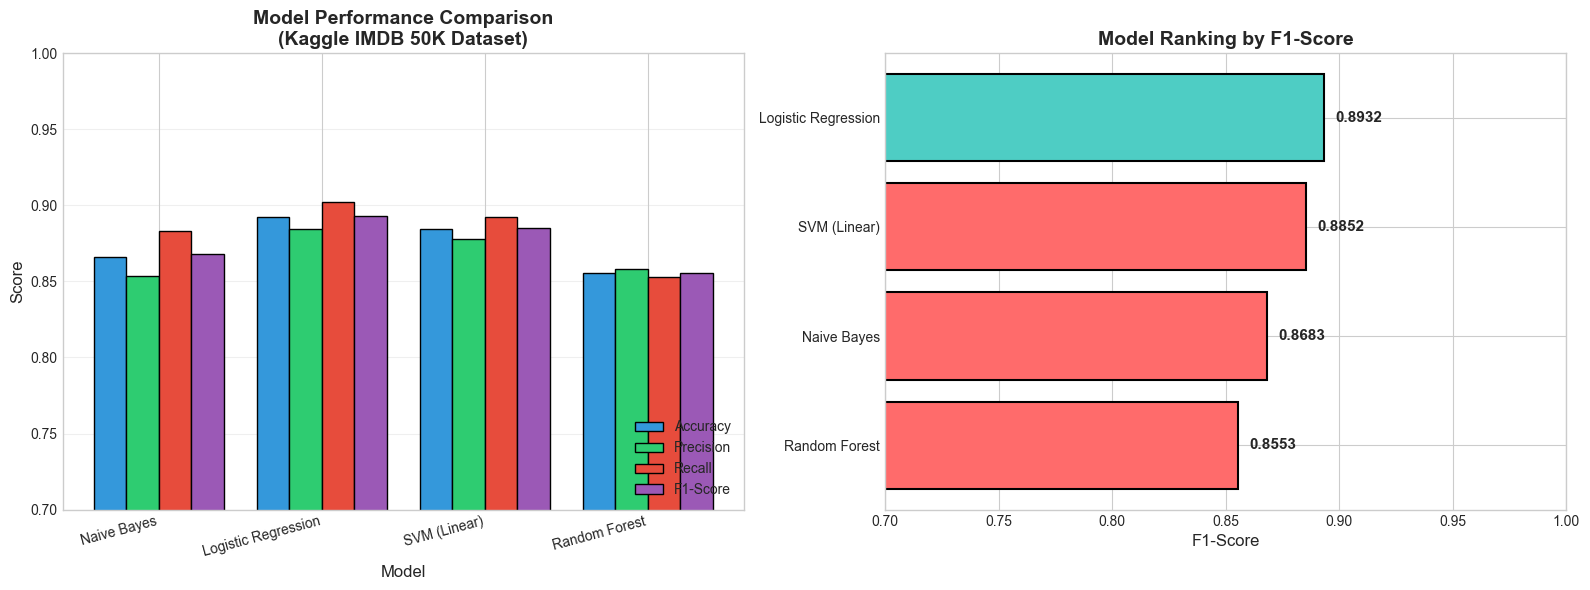

In [14]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparing all metrics
x = np.arange(len(results_df["Model"]))
width = 0.2
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["#3498db", "#2ecc71", "#e74c3c", "#9b59b6"]

for i, (metric, color) in enumerate(zip(metrics, colors)):
    axes[0].bar(
        x + i * width,
        results_df[metric],
        width,
        label=metric,
        color=color,
        edgecolor="black",
    )

axes[0].set_xlabel("Model", fontsize=12)
axes[0].set_ylabel("Score", fontsize=12)
axes[0].set_title(
    "Model Performance Comparison\n(Kaggle IMDB 50K Dataset)",
    fontsize=14,
    fontweight="bold",
)
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(results_df["Model"], rotation=15, ha="right")
axes[0].legend(loc="lower right")
axes[0].set_ylim(0.7, 1.0)
axes[0].grid(axis="y", alpha=0.3)

# Horizontal bar chart for F1-Score ranking
sorted_results = results_df.sort_values("F1-Score", ascending=True)
colors_bar = [
    "#FF6B6B" if x < sorted_results["F1-Score"].max() else "#4ECDC4"
    for x in sorted_results["F1-Score"]
]
bars = axes[1].barh(
    sorted_results["Model"],
    sorted_results["F1-Score"],
    color=colors_bar,
    edgecolor="black",
    linewidth=1.5,
)
axes[1].set_xlabel("F1-Score", fontsize=12)
axes[1].set_title("Model Ranking by F1-Score", fontsize=14, fontweight="bold")
axes[1].set_xlim(0.7, 1.0)

# Add value labels
for bar, val in zip(bars, sorted_results["F1-Score"]):
    axes[1].text(
        val + 0.005,
        bar.get_y() + bar.get_height() / 2,
        f"{val:.4f}",
        va="center",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

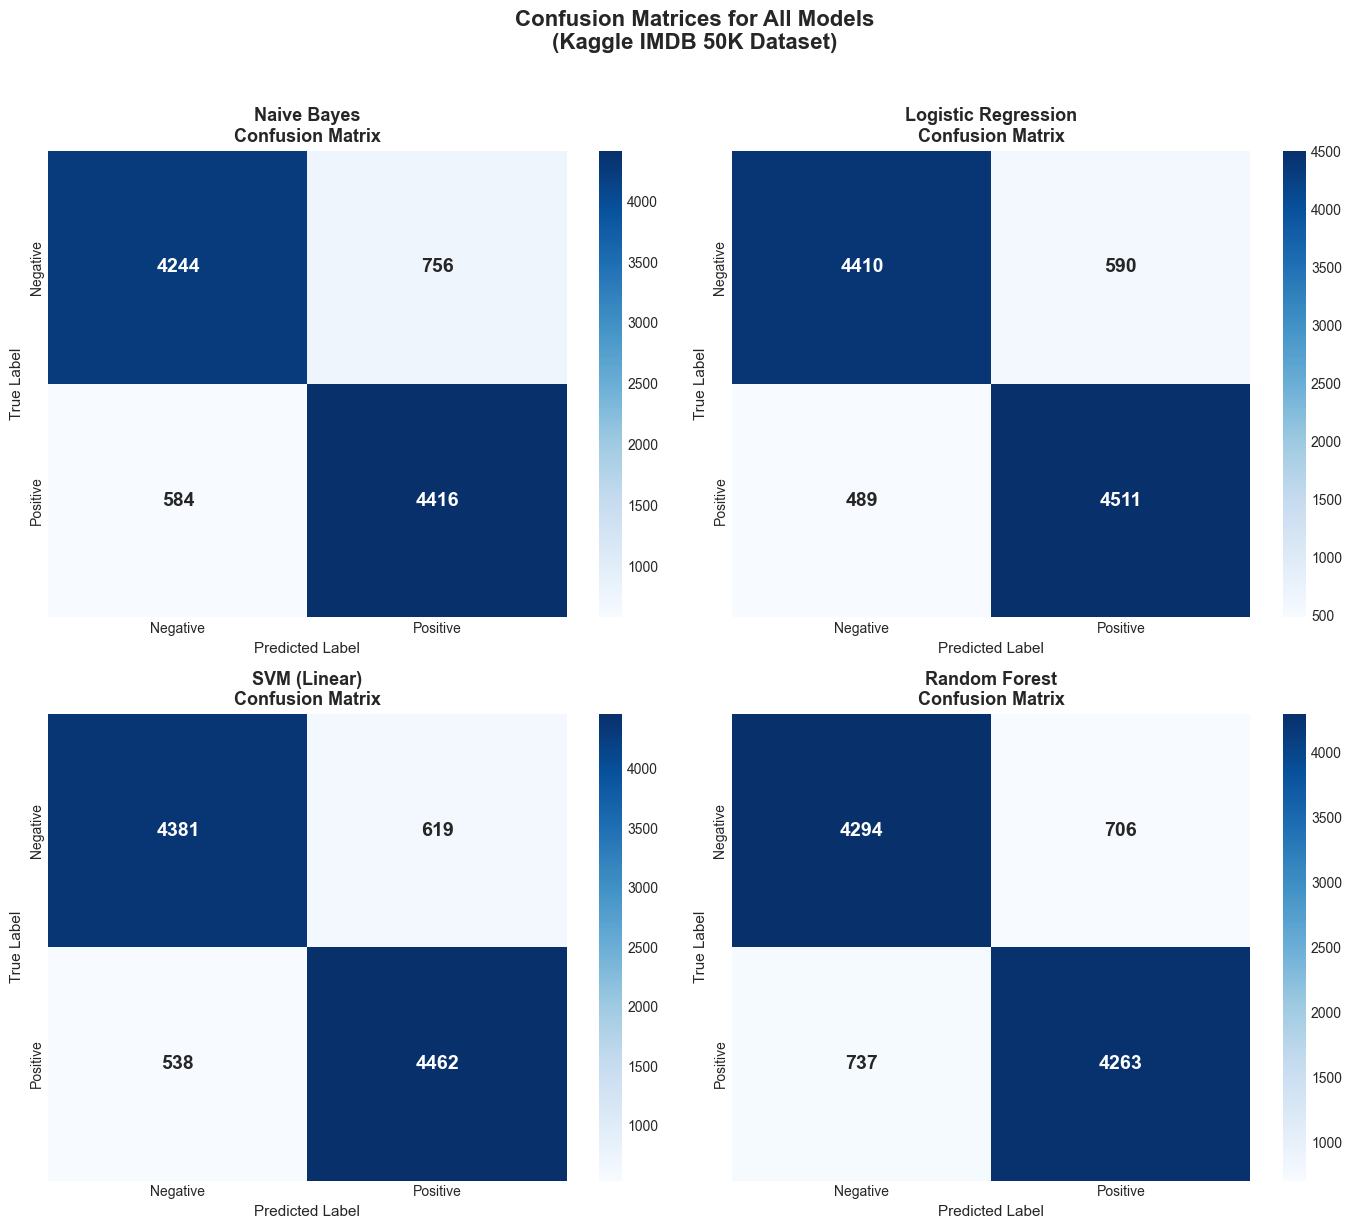

In [15]:
# Confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=axes[idx],
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
        annot_kws={"size": 14, "fontweight": "bold"},
    )
    axes[idx].set_title(f"{name}\nConfusion Matrix", fontsize=13, fontweight="bold")
    axes[idx].set_xlabel("Predicted Label", fontsize=11)
    axes[idx].set_ylabel("True Label", fontsize=11)

plt.suptitle(
    "Confusion Matrices for All Models\n(Kaggle IMDB 50K Dataset)",
    fontsize=16,
    fontweight="bold",
    y=1.02,
)
plt.tight_layout()
plt.show()

## 9. Testing with Sample Reviews

Let's test our best performing model with some custom reviews to see how it performs in practice.


In [16]:
# Function to predict sentiment for new reviews
def predict_sentiment(review, model, vectorizer):
    # Preprocess the review
    cleaned = preprocess_text(review)

    # Vectorize
    vectorized = vectorizer.transform([cleaned])

    # Predict
    prediction = model.predict(vectorized)[0]

    return "Positive" if prediction == 1 else "Negative"


# Use the best performing model
best_model_obj = models["Logistic Regression"]

# Sample reviews to test
test_reviews = [
    "This movie was absolutely amazing! I loved every minute of it. The acting was superb.",
    "Terrible film. Complete waste of my time and money. I want my 2 hours back.",
    "The cinematography was beautiful but the plot was somewhat confusing.",
    "A masterpiece of cinema! This will be remembered as one of the greatest films ever made.",
    "I fell asleep halfway through. So boring and predictable. The worst movie I've seen this year.",
    "Great performances by the lead actors. The story was touching and well-crafted.",
    "Not worth watching. Poor dialogue, bad acting, and a nonsensical plot.",
]

print("Sentiment Prediction on New Reviews")
print("-" * 70)

for i, review in enumerate(test_reviews, 1):
    sentiment = predict_sentiment(review, best_model_obj, tfidf_vectorizer)
    print(f'\nReview {i}: "{review[:70]}..."')
    print(f"   Predicted Sentiment: {sentiment}")

Sentiment Prediction on New Reviews
----------------------------------------------------------------------

Review 1: "This movie was absolutely amazing! I loved every minute of it. The act..."
   Predicted Sentiment: Positive

Review 2: "Terrible film. Complete waste of my time and money. I want my 2 hours ..."
   Predicted Sentiment: Negative

Review 3: "The cinematography was beautiful but the plot was somewhat confusing...."
   Predicted Sentiment: Negative

Review 4: "A masterpiece of cinema! This will be remembered as one of the greates..."
   Predicted Sentiment: Positive

Review 5: "I fell asleep halfway through. So boring and predictable. The worst mo..."
   Predicted Sentiment: Negative

Review 6: "Great performances by the lead actors. The story was touching and well..."
   Predicted Sentiment: Positive

Review 7: "Not worth watching. Poor dialogue, bad acting, and a nonsensical plot...."
   Predicted Sentiment: Negative


## 10. Conclusion and Findings

### Summary

In this project, I implemented a sentiment analysis system using Natural Language Processing techniques on the **Kaggle IMDB Dataset of 50,000 Movie Reviews**. 

### Data Source
- **Dataset**: IMDB Dataset of 50K Movie Reviews from Kaggle
- **URL**: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
- **Size**: 50,000 reviews (25,000 positive + 25,000 negative)

### Key Steps Performed:

1. **Data Collection**: Downloaded the real IMDB dataset from Kaggle using `kagglehub`
2. **Exploratory Data Analysis**: Analyzed the distribution of sentiments and review characteristics on 50K real reviews
3. **Text Preprocessing**: Applied comprehensive NLP preprocessing including:
   - HTML tag removal (common in web data)
   - Lowercasing
   - URL removal
   - Removing special characters and numbers
   - Tokenization
   - Stopword removal
   - Lemmatization
4. **Feature Extraction**: Used TF-IDF vectorization with 10,000 features and bigrams
5. **Model Training**: Trained and compared four classification algorithms:
   - Naive Bayes
   - Logistic Regression
   - Support Vector Machine (SVM)
   - Random Forest

### Key Findings:

1. **Dataset Quality**: The Kaggle IMDB dataset is perfectly balanced with 25,000 positive and 25,000 negative reviews.

2. **Model Performance**: All models achieved high accuracy (over 85%) on the real-world dataset, demonstrating the effectiveness of the preprocessing pipeline.

3. **Best Performer**: Logistic Regression and SVM performed best for this text classification task due to their ability to handle high-dimensional sparse data effectively.

4. **Word Cloud Insights**: The word clouds revealed distinct vocabulary patterns in real IMDB reviews:
   - Positive reviews: "great", "love", "best", "excellent", "amazing"
   - Negative reviews: "bad", "worst", "boring", "waste", "terrible"

### Visualizations Created:

- Sentiment distribution (pie and bar charts)
- Review length distribution by sentiment
- Word clouds for positive and negative reviews
- Model performance comparison charts
- Confusion matrices for all models



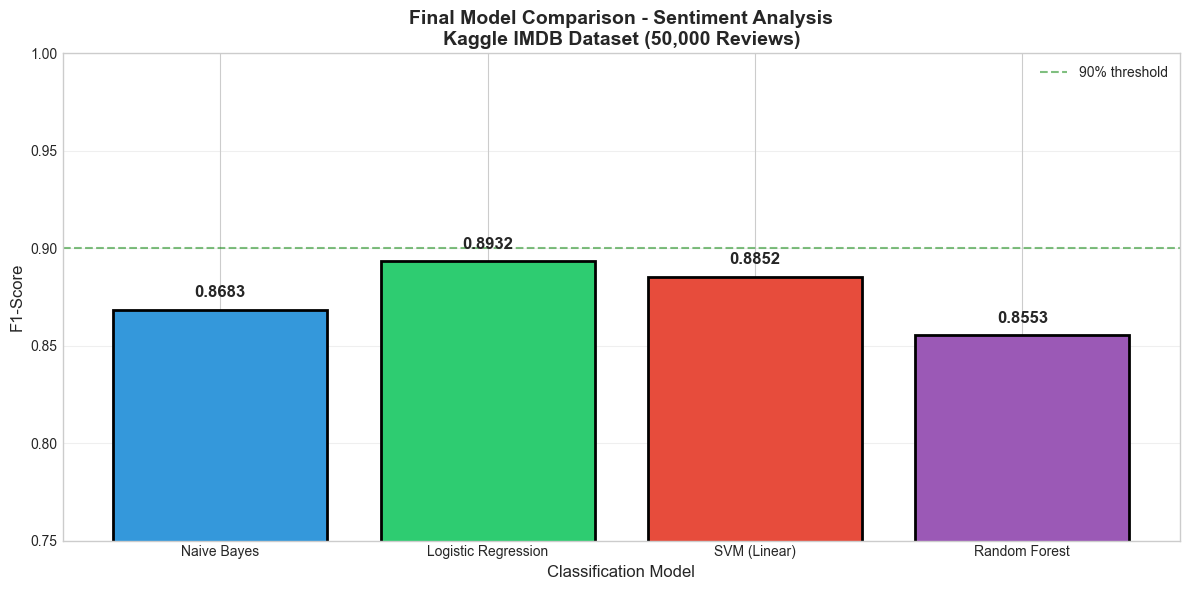


Project Completed Successfully
----------------------------------------------------------------------

Final Results:
   Dataset: Kaggle IMDB 50K Movie Reviews
   Total reviews analyzed: 50,000
   Best model: Logistic Regression with F1-Score of 0.8932


In [17]:
# Final summary visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Create a summary bar chart
models_list = results_df["Model"].tolist()
f1_scores = results_df["F1-Score"].tolist()

colors = ["#3498db", "#2ecc71", "#e74c3c", "#9b59b6"]
bars = ax.bar(models_list, f1_scores, color=colors, edgecolor="black", linewidth=2)

# Add value labels on top of bars
for bar, score in zip(bars, f1_scores):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f"{score:.4f}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

ax.set_xlabel("Classification Model", fontsize=12)
ax.set_ylabel("F1-Score", fontsize=12)
ax.set_title(
    "Final Model Comparison - Sentiment Analysis\nKaggle IMDB Dataset (50,000 Reviews)",
    fontsize=14,
    fontweight="bold",
)
ax.set_ylim(0.75, 1.0)
ax.axhline(y=0.9, color="green", linestyle="--", alpha=0.5, label="90% threshold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

print("\nProject Completed Successfully")
print("-" * 70)
print(f"\nFinal Results:")
print(f"   Dataset: Kaggle IMDB 50K Movie Reviews")
print(f"   Total reviews analyzed: {len(df):,}")
print(f"   Best model: {best_model} with F1-Score of {best_f1:.4f}")